<a href="https://colab.research.google.com/github/netakopel/Kaggle_Projects/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [69]:
import pandas as pd
import matplotlib.pyplot as plt


Load the Data

In [60]:
df_train = pd.read_csv('train.csv')
features_train = df_train.drop(columns=["Survived"])
labels_train = df_train["Survived"]
features_test = pd.read_csv('test.csv')



EDA

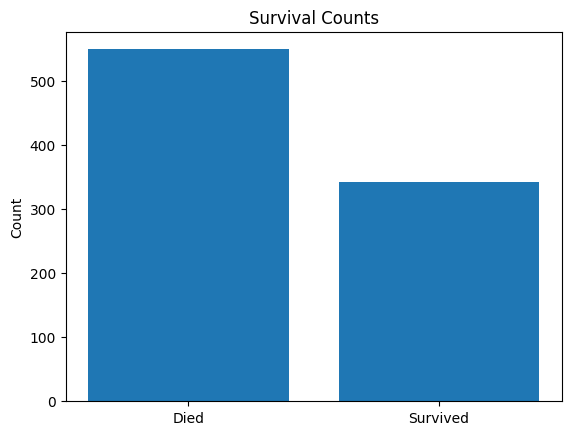

In [78]:
# check for frequancy of missing data
features_train.isnull().mean()

# survival distribution
survived_counts = features_train['Survived'].value_counts()
plt.bar(['Died', 'Survived'], survived_counts)
plt.title('Survival Counts')
plt.ylabel('Count')
plt.show()

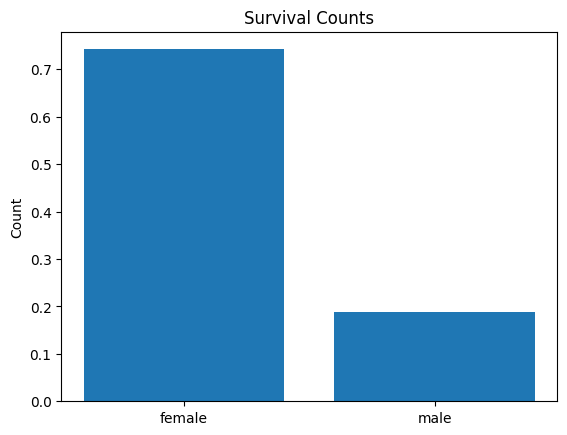

In [79]:
# gender survival distribution
survived_by_sex = features_train.groupby('Sex')['Survived'].mean()
plt.bar(survived_by_sex.index, survived_by_sex.values)
plt.title('Survival Precentage per Sex')
plt.ylabel('Precentage')
plt.show()

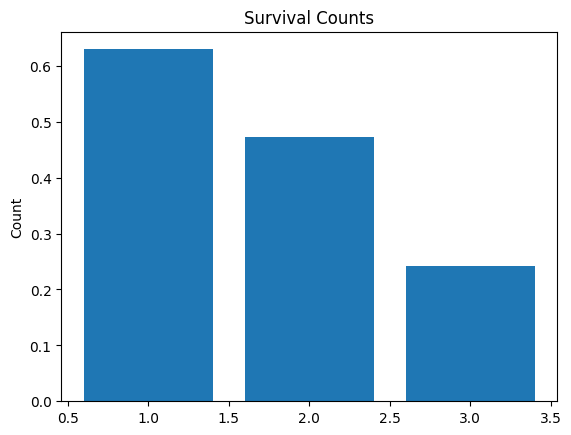

In [85]:
survived_by_Pclass = features_train.groupby('Pclass')['Survived'].mean()
plt.bar(survived_by_Pclass.index, survived_by_Pclass.values)
plt.title('Survival Precentage per Pclass')
plt.ylabel('Precentage')
plt.show()

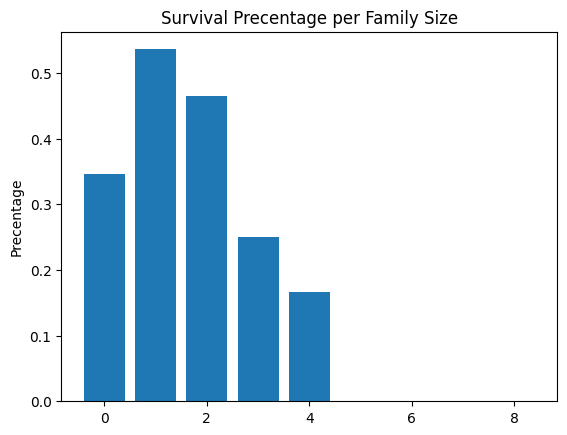

In [96]:
features_train["FamilySize"] = features_train["SibSp"] + features_train["Parch"]
survived_by_family_size = features_train.groupby("FamilySize")["Survived"].mean()
plt.bar(survived_by_family_size.index, survived_by_family_size.values)
plt.title('Survival Precentage per Family Size')
plt.ylabel('Precentage')
plt.show()

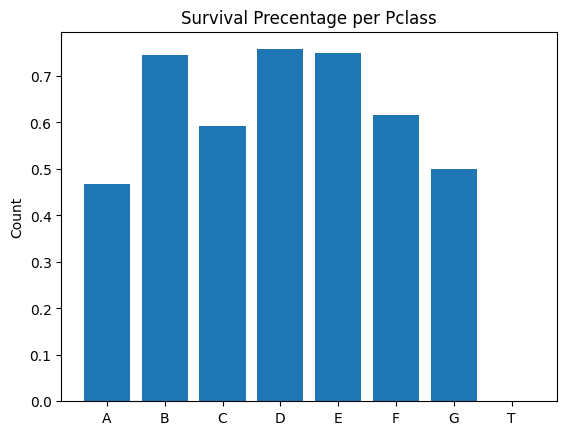

In [91]:
features_train['CabinFirstLetter'] = features_train['Cabin'].str[0]
survived_by_cabin_first_letter = features_train.groupby('CabinFirstLetter')['Survived'].mean()
plt.bar(survived_by_cabin_first_letter.index, survived_by_cabin_first_letter.values)
plt.title('Survival Precentage per Pclass')
plt.ylabel('Precentage')
plt.show()

Feature Engineering

In [114]:
# add HasCabin and FamilySize feature
features_train["HasCabin"] = features_train['Cabin'].notna()
features_train["FamilySize"] = features_train["SibSp"] + features_train["Parch"]

#fill age by median of gender and class
features_train["Age"] =  features_train.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

#fill embarked by most frequent embarked
most_frequent_embarked = features_train["Embarked"].mode()[0]
features_train["Embarked"] =features_train["Embarked"].fillna(most_frequent_embarked)


np.int64(0)

Model class

In [46]:
class Model:
  def __init__ (self, features, labels):
    self.features = features
    self.labels = labels
  def train():
    pass
  def predict(self,features):
    return (features["Sex"]=="female").astype(int)



Submission


In [47]:
model = Model(features_train,labels_train)
model.train()
preds = model.predict(features_test)
submission = pd.DataFrame({"PassengerId": features_test["PassengerId"], "Survived": preds})
submission.to_csv("submission.csv", index=False)